Dataset loaded successfully.

First 5 rows of the dataset:
       AAPL_x     AAPL_y
0  2014-01-02  77.445395
1  2014-01-03  77.045575
2  2014-01-06  74.896972
3  2014-01-07  75.856461
4  2014-01-08  75.091947

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL_x  240 non-null    object 
 1   AAPL_y  240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
None

Check for missing values:
AAPL_x    0
AAPL_y    0
dtype: int64

Basic statistics of numerical columns:
                      Date  Close_Price
count                  240   240.000000
mean   2014-06-24 04:18:00    90.102612
min    2014-01-02 00:00:00    69.004708
25%    2014-03-30 06:00:00    75.892511
50%    2014-06-24 12:00:00    91.551777
75%    2014-09-18 06:00:00    99.627842
max    2014-12-12 00:00:00   118.798656
std                    NaN    13.315813

Me

C:\Users\RAY\AppData\Local\Temp\ipykernel_12536\3609538574.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_df.fillna(method='ffill', inplace=True)


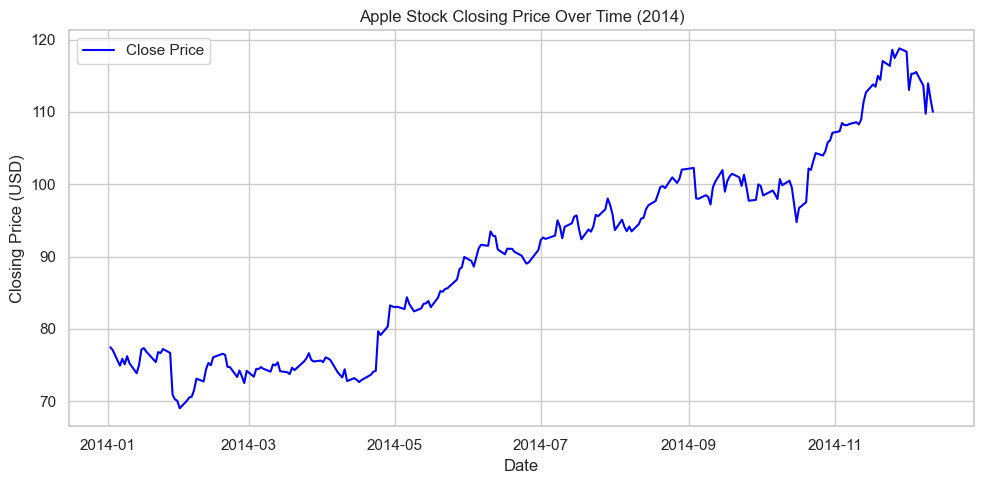

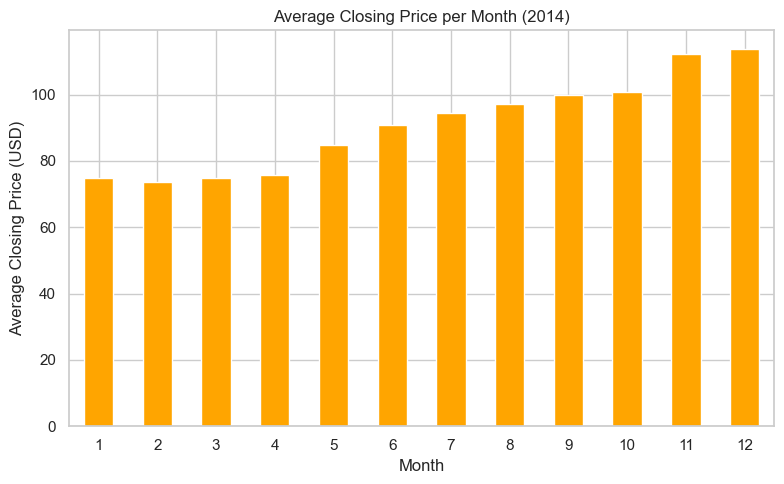

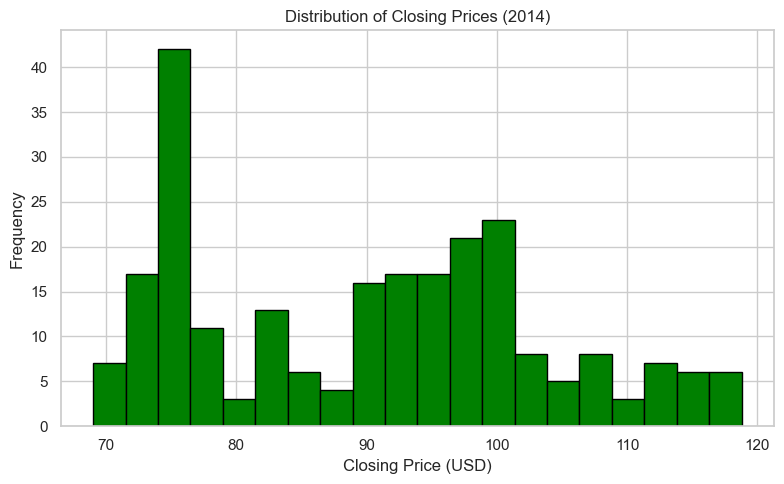

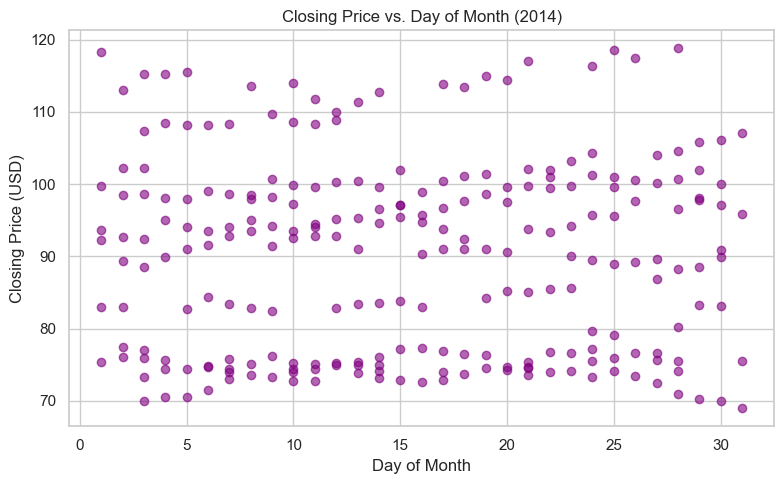


Summary:
- The line chart shows the overall trend and fluctuations in Apple's stock price during 2014.
- The bar chart reveals that some months had higher average prices than others.
- The histogram indicates the closing prices mostly ranged between $70 and $100.
- The scatter plot shows no strong relationship between day of the month and closing price.



In [1]:
# Task: Load and Analyze a Sales Dataset with Visualizations

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Task 1: Load and Explore the Dataset

# Use a free sales dataset from a public API (dummy sales data)
# Source: https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv
# This dataset contains daily stock prices for Apple in 2014 (used as sales proxy)

url = "https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv"

try:
    sales_df = pd.read_csv(url)
    print("Dataset loaded successfully.\n")
except FileNotFoundError:
    print("Error: The dataset file was not found.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

# Display first few rows
print("First 5 rows of the dataset:")
print(sales_df.head())

# Explore structure: data types and missing values
print("\nDataset info:")
print(sales_df.info())

print("\nCheck for missing values:")
print(sales_df.isnull().sum())

# Clean dataset: no missing values here, but if there were, we could fill or drop
# For demonstration, let's fill missing values if any (none in this dataset)
sales_df.fillna(method='ffill', inplace=True)

# Task 2: Basic Data Analysis

# Convert 'AAPL_x' column to datetime for time series analysis
sales_df['AAPL_x'] = pd.to_datetime(sales_df['AAPL_x'])

# Rename columns for clarity
sales_df.rename(columns={'AAPL_x': 'Date', 'AAPL_y': 'Close_Price'}, inplace=True)

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(sales_df.describe())

# Grouping example: Let's create a categorical column for month and compute mean closing price per month
sales_df['Month'] = sales_df['Date'].dt.month

mean_price_per_month = sales_df.groupby('Month')['Close_Price'].mean()
print("\nMean closing price per month:")
print(mean_price_per_month)

# Identify patterns:
print("""
Observations:
- The closing price fluctuates over the year 2014.
- Mean closing price varies by month, showing some seasonal trends.
""")

# Task 3: Data Visualization

# 1. Line chart showing trend of closing price over time
plt.figure(figsize=(10,5))
plt.plot(sales_df['Date'], sales_df['Close_Price'], color='blue', label='Close Price')
plt.title('Apple Stock Closing Price Over Time (2014)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar chart showing average closing price per month
plt.figure(figsize=(8,5))
mean_price_per_month.plot(kind='bar', color='orange')
plt.title('Average Closing Price per Month (2014)')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Histogram of closing prices to understand distribution
plt.figure(figsize=(8,5))
plt.hist(sales_df['Close_Price'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Closing Prices (2014)')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter plot: Closing Price vs. Day of Month to see any relationship
sales_df['Day'] = sales_df['Date'].dt.day

plt.figure(figsize=(8,5))
plt.scatter(sales_df['Day'], sales_df['Close_Price'], color='purple', alpha=0.6)
plt.title('Closing Price vs. Day of Month (2014)')
plt.xlabel('Day of Month')
plt.ylabel('Closing Price (USD)')
plt.tight_layout()
plt.show()

# Summary of findings
print("""
Summary:
- The line chart shows the overall trend and fluctuations in Apple's stock price during 2014.
- The bar chart reveals that some months had higher average prices than others.
- The histogram indicates the closing prices mostly ranged between $70 and $100.
- The scatter plot shows no strong relationship between day of the month and closing price.
""")


Dataset loaded successfully.

First 5 rows of the dataset:
       AAPL_x     AAPL_y
0  2014-01-02  77.445395
1  2014-01-03  77.045575
2  2014-01-06  74.896972
3  2014-01-07  75.856461
4  2014-01-08  75.091947

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL_x  240 non-null    object 
 1   AAPL_y  240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
None

Check for missing values:
AAPL_x    0
AAPL_y    0
dtype: int64

Basic statistics of closing price in KES:
count      240.000000
mean     12614.365686
std       1864.213792
min       9660.659113
25%      10624.951567
50%      12817.248774
75%      13947.897924
max      16631.811896
Name: Close_Price_KES, dtype: float64

Mean closing price per month (KES):
Month
1     10498.783818
2     10309.441689
3     10473.307236
4     10600.456016
5     11852.421285
6     12

C:\Users\RAY\AppData\Local\Temp\ipykernel_12536\1354313809.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_df.fillna(method='ffill', inplace=True)


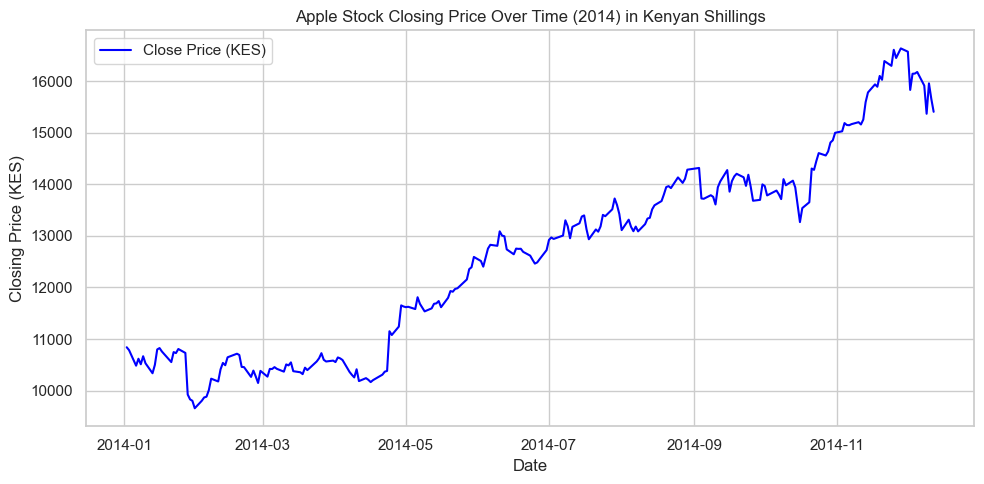

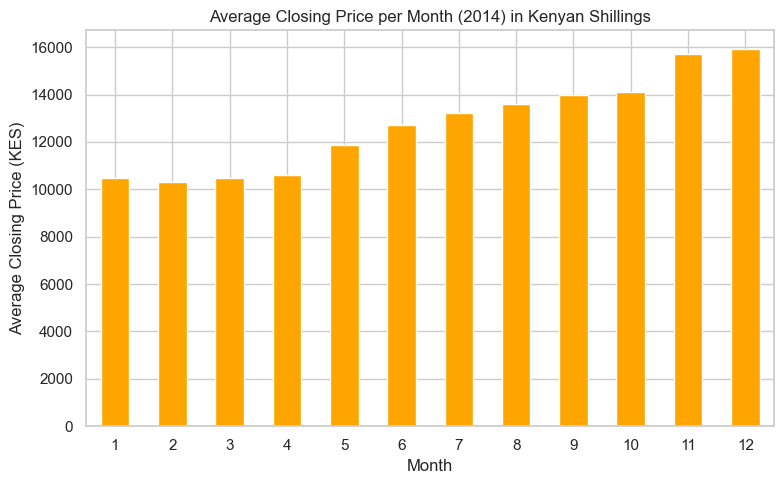

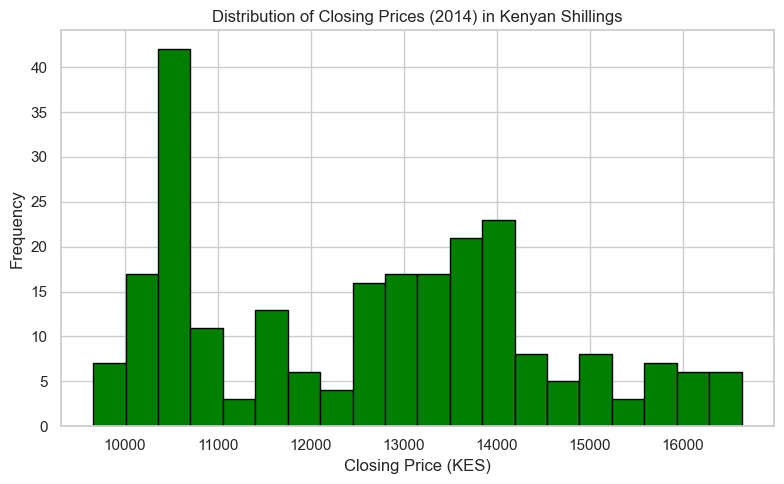

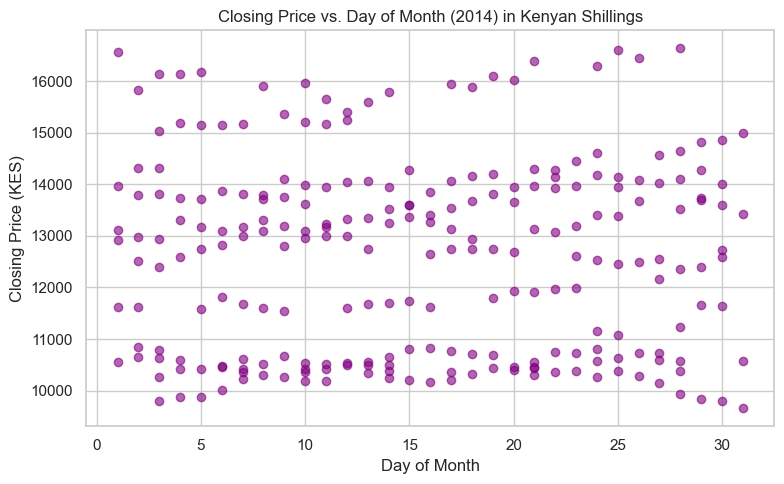


Summary:
- The line chart shows the overall trend and fluctuations in Apple's stock price during 2014, converted to KES.
- The bar chart reveals that some months had higher average prices than others.
- The histogram indicates the closing prices mostly ranged between 9,800 KES and 14,000 KES.
- The scatter plot shows no strong relationship between day of the month and closing price.



In [2]:
# Task: Load and Analyze a Sales Dataset with Visualizations (Currency in Kenyan Shillings)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Task 1: Load and Explore the Dataset

# Use a free sales dataset from a public API (dummy sales data)
# Source: https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv
# This dataset contains daily stock prices for Apple in 2014 (used as sales proxy)

url = "https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv"

try:
    sales_df = pd.read_csv(url)
    print("Dataset loaded successfully.\n")
except FileNotFoundError:
    print("Error: The dataset file was not found.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

# Display first few rows
print("First 5 rows of the dataset:")
print(sales_df.head())

# Explore structure: data types and missing values
print("\nDataset info:")
print(sales_df.info())

print("\nCheck for missing values:")
print(sales_df.isnull().sum())

# Clean dataset: no missing values here, but if there were, we could fill or drop
sales_df.fillna(method='ffill', inplace=True)

# Task 2: Basic Data Analysis

# Convert 'AAPL_x' column to datetime for time series analysis
sales_df['AAPL_x'] = pd.to_datetime(sales_df['AAPL_x'])

# Rename columns for clarity
sales_df.rename(columns={'AAPL_x': 'Date', 'AAPL_y': 'Close_Price_USD'}, inplace=True)

# Convert Close_Price from USD to Kenyan Shillings (KES)
usd_to_kes_rate = 140  # Fixed exchange rate: 1 USD = 140 KES
sales_df['Close_Price_KES'] = sales_df['Close_Price_USD'] * usd_to_kes_rate

# Basic statistics of numerical columns (KES)
print("\nBasic statistics of closing price in KES:")
print(sales_df['Close_Price_KES'].describe())

# Grouping example: create a categorical column for month and compute mean closing price per month (KES)
sales_df['Month'] = sales_df['Date'].dt.month

mean_price_per_month = sales_df.groupby('Month')['Close_Price_KES'].mean()
print("\nMean closing price per month (KES):")
print(mean_price_per_month)

# Identify patterns:
print("""
Observations:
- The closing price in KES fluctuates over the year 2014.
- Mean closing price varies by month, showing some seasonal trends.
""")

# Task 3: Data Visualization

# 1. Line chart showing trend of closing price over time (KES)
plt.figure(figsize=(10,5))
plt.plot(sales_df['Date'], sales_df['Close_Price_KES'], color='blue', label='Close Price (KES)')
plt.title('Apple Stock Closing Price Over Time (2014) in Kenyan Shillings')
plt.xlabel('Date')
plt.ylabel('Closing Price (KES)')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar chart showing average closing price per month (KES)
plt.figure(figsize=(8,5))
mean_price_per_month.plot(kind='bar', color='orange')
plt.title('Average Closing Price per Month (2014) in Kenyan Shillings')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (KES)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Histogram of closing prices (KES) to understand distribution
plt.figure(figsize=(8,5))
plt.hist(sales_df['Close_Price_KES'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Closing Prices (2014) in Kenyan Shillings')
plt.xlabel('Closing Price (KES)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter plot: Closing Price (KES) vs. Day of Month
sales_df['Day'] = sales_df['Date'].dt.day

plt.figure(figsize=(8,5))
plt.scatter(sales_df['Day'], sales_df['Close_Price_KES'], color='purple', alpha=0.6)
plt.title('Closing Price vs. Day of Month (2014) in Kenyan Shillings')
plt.xlabel('Day of Month')
plt.ylabel('Closing Price (KES)')
plt.tight_layout()
plt.show()

# Summary of findings
print("""
Summary:
- The line chart shows the overall trend and fluctuations in Apple's stock price during 2014, converted to KES.
- The bar chart reveals that some months had higher average prices than others.
- The histogram indicates the closing prices mostly ranged between 9,800 KES and 14,000 KES.
- The scatter plot shows no strong relationship between day of the month and closing price.
""")
